In [68]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [450]:
temps = xr.open_dataset('TREFHTMN_TREFHTMX_82N62W_B20TRC5CNBDRD.f09_g16.002.cam.h1.19200101-20051231.nc')

In [451]:
temps_future = xr.open_dataset('TREFHTMN_TREFHTMX_82N62W_B20TRC5CNBDRD.f09_g16.002.cam.h1.19200101-21001231')

In [71]:
tmin = temps.TREFHTMN
tmax = temps.TREFHTMX

tmax.shape

(31390,)

In [452]:
tmin_f = temps_future.TREFHTMN
tmax_f = temps_future.TREFHTMX

In [154]:
gs_min = tmin.groupby('time.dayofyear')
gs_max = tmax.groupby('time.dayofyear')
gs_min, gs_max

(DataArrayGroupBy, grouped over 'dayofyear'
 365 groups with labels 1, 2, 3, 4, 5, ..., 362, 363, 364, 365.,
 DataArrayGroupBy, grouped over 'dayofyear'
 365 groups with labels 1, 2, 3, 4, 5, ..., 362, 363, 364, 365.)

In [37]:
len(gs_min), gs_min.groups.keys()


(365,
 dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [38]:
gs_min[1], gs_min[1].size

(<xarray.DataArray 'TREFHTMN' (time: 86)>
 array([235.82176, 234.34546, 251.2102 , 240.53023, 234.72034, 227.6539 ,
        234.49188, 244.68462, 244.31744, 238.50087, 235.7606 , 239.23584,
        232.3521 , 230.49095, 237.52876, 236.19131, 225.16519, 253.59077,
        244.93163, 242.21114, 250.25804, 258.39175, 237.98378, 235.87433,
        233.0406 , 243.82191, 261.84924, 226.42198, 238.23407, 230.65712,
        236.48056, 242.49838, 233.54861, 259.97348, 239.15198, 247.51743,
        235.35437, 240.89163, 236.13489, 243.58131, 240.54248, 235.16612,
        255.7763 , 239.04158, 247.09941, 262.43628, 227.45135, 233.93675,
        241.15318, 265.2213 , 234.36044, 239.7768 , 233.23283, 244.75912,
        249.29623, 230.75888, 245.28809, 241.77203, 252.29752, 253.03526,
        245.07031, 235.81606, 246.85796, 243.60551, 232.8705 , 233.76802,
        232.57402, 239.83447, 228.60852, 259.37064, 242.22667, 243.06195,
        241.72519, 246.21811, 231.19316, 250.17924, 234.12476, 246.873

In [63]:
# mam 345
tmin.sel(time=((tmin['time.dayofyear']>=60) & (tmin['time.dayofyear']<=63)))

<xarray.DataArray 'TREFHTMN' (time: 344)>
array([231.11063, 231.93768, 237.31514, ..., 243.90828, 244.96724, 252.86029],
      dtype=float32)
Coordinates:
    lat      float64 82.46
    lon      float64 62.5
  * time     (time) object 1920-03-01 00:00:00 ... 2005-03-04 00:00:00
Attributes:
    units:         K
    long_name:     Minimum reference height temperature over output period
    cell_methods:  time: minimum

In [115]:
#for dayofyear, temps  in gs_min:
    #my_list = []
    #my_list.append(((>=dayofyear-7) & (<=dayofyear+7)))
    #for temp in temps:
        

In [116]:
#for temp in gs:
    #print(gs[temp])

In [191]:
temps_in_window = [ ]
temps_in_window.extend(list(gs_min[key].data))

In [261]:
# %%time
# # 15 day rolling window for daily MIN temps 
# min90_pct = []
# temp_placeholder_min = []

# # start in spring (march 1)
# for i in range(60,152): #windows -- center days
#     temp_placeholder_min = []
#     for key in range(i-7,i+8): #days in window
#         values_min=gs_min[key]
#         for value in values_min: #years of day 
#             temp_placeholder_min.append(value)
#     min90_pct.append(np.percentile(temp_placeholder_min, 0.9))
    

In [266]:
%%time
# 15 day rolling window for daily MIN temps 
min90_pct = []
# temp_placeholder_min = []

# start in spring (march 1)
for i in range(60,152): #windows -- center days
    temp_placeholder_min = []
    for key in range(i-7,i+8): #days in window
        values_min=gs_min[key]
        temp_placeholder_min.extend(values_min) #append entire list of years of day
    min90_pct.append(np.percentile(temp_placeholder_min, 90))
    

CPU times: user 1min 16s, sys: 1.13 s, total: 1min 17s
Wall time: 1min 24s


In [271]:
15*len(gs_min[key])

1290

In [269]:
len(temp_placeholder_min), len(min90_pct)

(1290, 92)

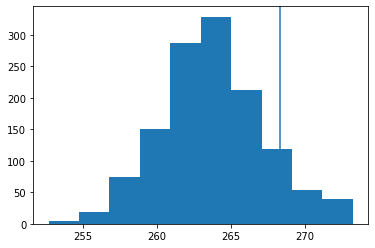

In [272]:
plt.hist(temp_placeholder_min)
plt.axvline(min90_pct[-1])

In [168]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [172]:
type(min90_pct),type(spr2005)

(list, xarray.core.dataarray.DataArray)

In [206]:
min90_pct[:5], len(min90_pct) #will be 92 for total days in spr MAM, 345

([226.44721563720702,
  226.27860690307617,
  226.0988106536865,
  225.89268460083008,
  226.13849961853026],
 92)

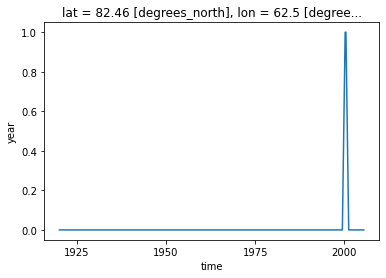

In [258]:
(spr['time.year']==2000).plot()

In [259]:
spr

<xarray.DataArray 'TREFHTMN' (time: 7912)>
array([231.11063, 231.93768, 237.31514, ..., 263.92288, 263.3127 , 264.17294],
      dtype=float32)
Coordinates:
    lat      float64 82.46
    lon      float64 62.5
  * time     (time) object 1920-03-01 00:00:00 ... 2005-05-31 00:00:00
Attributes:
    units:         K
    long_name:     Minimum reference height temperature over output period
    cell_methods:  time: minimum

In [409]:
ends_in_loop

array([15, 35, 47, 61, 68, 75, 78, 81])

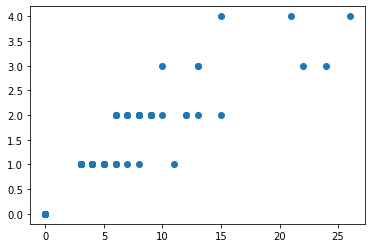

In [423]:
plt.scatter(hwf,hwn); #hwf - how many days are in heat waves(x) #hwn - how many heat waves are there per year(y) 

In [425]:
hwf_corr_hwn = np.corrcoef(hwf,hwn)
hwf_corr_hwn

array([[1.        , 0.91733704],
       [0.91733704, 1.        ]])

There is a positive correlation with the sum of participating heat wave days and the number of heat waves. This implies that as the more heat wave days, the more heat waves the region will experience. 

In [421]:
max(hwf), max(hwn)

(26, 4)

/var/folders/zx/shncch5556dgfcgkck0jvqqh0000gn/T/ipykernel_91212/451088912.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "file" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('alert_spr_hw', file='jpeg');


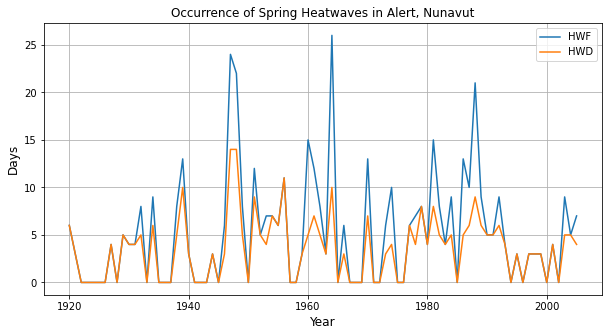

In [449]:
plt.figure(figsize=(10,5)) #waht would be the obvious q, how would you address it?
#plt.plot(range(1920,2006),hwn) #blue
plt.plot(range(1920,2006),hwf, label='HWF') #orange
plt.plot(range(1920,2006),hwd, label='HWD') #green
#plt.xlim(1980,2000)
#plt.plot(range(1920,2006),hwn_min, color='blue', label='HWN') 
font = {'family': 'Sans',
        'color': 'black', 
        'weight': 'normal', 
        'size': 12,
       }
plt.title('Occurrence of Spring Heatwaves in Alert, Nunavut', fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Days', fontdict=font)
plt.grid()
plt.legend()
plt.savefig('alert_spr_hw', file='jpeg');

In [ ]:
plt.figure(figsize=(10,5)) #waht would be the obvious q, how would you address it?
#plt.plot(range(1920,2006),hwn) #blue
plt.plot(range(1920,2006),hwf, label='HWF') #orange
plt.plot(range(1920,2006),hwd, label='HWD') #green
#plt.xlim(1980,2000)
#plt.plot(range(1920,2006),hwn_min, color='blue', label='HWN') 
font = {'family': 'Sans',
        'color': 'black', 
        'weight': 'normal', 
        'size': 12,
       }
plt.title('Occurrence of Spring Heatwaves in Alert, Nunavut', fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Days', fontdict=font)
plt.grid()
plt.legend()
plt.savefig('alert_spr_hw', file='jpeg');

In [415]:
hwd=[] # the length (in days) of the longest yearly event
hwn=[] # yearly number of heat waves 
hwf=[] # sum of participating heat wave days per year 
for year in range(1920,2006):
    spryear = spr.sel(time=(spr['time.year']==year))
    print("length of year values: ", len(spryear))
    above_90_pct_bool_list = spryear > min90_pct
    print("len of true and false bool array: ", len(above_90_pct_bool_list))
    diffs = np.diff(above_90_pct_bool_list.astype(int))
    print(diffs)
    starts_in_loop = np.where(diffs==1)[0] # gives the indices where our starts are
    print("start indices: ", starts_in_loop)
    ends_in_loop = np.where(diffs==-1)[0]
    print("end indices: ", ends_in_loop)
    #missing end
    if len(starts_in_loop) > len(ends_in_loop):
        starts_in_loop = starts_in_loop[0:-1]
    #missing start
    elif len(ends_in_loop) > len(starts_in_loop):
        ends_in_loop = ends_in_loop[1:]
    #missing start and missing end
    elif ((ends_in_loop-starts_in_loop)<0).any():
        starts_in_loop = starts_in_loop[:-1]
        ends_in_loop =ends_in_loop[1:]
    num_consecutive_hot_days_in_loop = ends_in_loop-starts_in_loop
    if len(num_consecutive_hot_days_in_loop) == 0:
        num_consecutive_hot_days_in_loop = np.array([0])
    print("num of consecutive hot days: ", num_consecutive_hot_days_in_loop, "\n")
    hwn.append(np.sum(num_consecutive_hot_days_in_loop>=3))
    heat_wave_durations = np.where(num_consecutive_hot_days_in_loop>=3, num_consecutive_hot_days_in_loop, 0)
    hwf.append(np.sum(heat_wave_durations))
    hwd.append(heat_wave_durations.max())

length of year values:  92
len of true and false bool array:  92
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
start indices:  [32]
end indices:  [38]
num of consecutive hot days:  [6] 

length of year values:  92
len of true and false bool array:  92
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
start indices:  [28]
end indices:  [31]
num of consecutive hot days:  [3] 

length of year values:  92
len of true and false bool array:  92
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0

In [408]:
np.array([0])

array([0])

In [407]:
np.sum(False)

0

In [405]:
np.sum(num_consecutive_hot_days_in_loop>=3)

4

In [336]:
len(spr.sel(time=(spr['time.year']==year))), len(min90_pct), len(starts_in_loop), len(ends_in_loop), len(above_90_pct_bool_list)

(92, 92, 6, 5, 92)

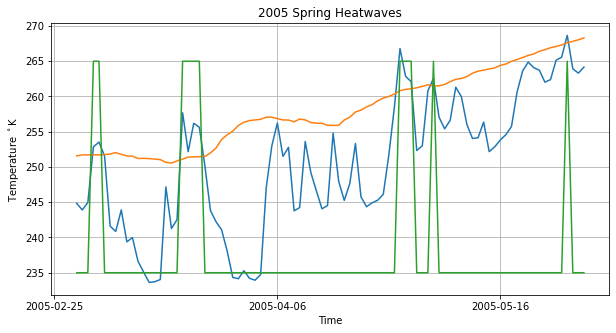

In [459]:
spr=tmin.sel(time=tmin['time.season']=='MAM')
spr2005=spr.sel(time=spr['time.year']==2005)
spr2005.plot(figsize=(10,5))
plt.plot(spr2005.time,min90_pct)


plt.plot(spr2005.time,235+(above_90pct_bool_list)*30)
plt.title('2005 Spring Heatwaves')
plt.xlabel('Time')
plt.ylabel('Temperature $^\circ$K')
plt.grid()
plt.savefig('T90_spring2005.png')

In [231]:
above_90pct_bool_list = spr2005 > min90_pct
above_90pct_bool_list

<xarray.DataArray 'TREFHTMN' (time: 92)>
array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])
Coordinates:
    lat      float64 82.46
    lon      float64 62.5
  * time     (time) object 2005-03-01 00:00:00 ... 2005-05-31 00:00:00

In [275]:
diff = np.diff(above_90pct_bool_list.astype(int))

In [347]:
len(diff),diff 

(91,
 array([ 0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, -1,  0,  0]))

In [304]:
# 1 == when we 1st detect the change we want F -> T
starts=np.where(diff==1)[0]
# -1 == when the change is no longer constant, back to its previous state T -> F
ends=np.where(diff==-1)[0]

In [338]:
len(starts), len(ends)

(5, 5)

In [300]:
type(ends),type(ends[0])

(tuple, numpy.ndarray)

In [306]:
ends, ends[0]

(array([ 4, 22, 60, 64, 88]), 4)

In [307]:
starts, starts[0]

(array([ 2, 18, 57, 63, 87]), 2)

In [305]:
num_consecutive_hot_days=ends-starts
num_consecutive_hot_days

array([2, 4, 3, 1, 1])

In [308]:
num_consecutive_hot_days>=3

array([False,  True,  True, False, False])

In [309]:
# HWN - the yearly number of heat waves
# for 2005 
np.sum(num_consecutive_hot_days>=3)

2

In [310]:
# HWD - the length (in days) of the longest yearly event 
num_consecutive_hot_days.max()

4

In [178]:
%%time
ex_90 = []
temp_ex = []

for i in range(60,67):
    for key in range(i-7,i+8):
        values_ex=gs_min[key]
        for value in values_ex:
            temp_ex.append(value)
    ex_90.append(np.percentile(temp_ex, 0.9))

CPU times: user 8.76 s, sys: 136 ms, total: 8.89 s
Wall time: 9.48 s


In [179]:
len(ex_90)

7

In [134]:
temp[:5]

[<xarray.DataArray 'TREFHTMN' ()>
 array(230.3134, dtype=float32)
 Coordinates:
     lat      float64 82.46
     lon      float64 62.5
     time     object 1920-02-22 00:00:00
 Attributes:
     units:         K
     long_name:     Minimum reference height temperature over output period
     cell_methods:  time: minimum,
 <xarray.DataArray 'TREFHTMN' ()>
 array(258.20093, dtype=float32)
 Coordinates:
     lat      float64 82.46
     lon      float64 62.5
     time     object 1921-02-22 00:00:00
 Attributes:
     units:         K
     long_name:     Minimum reference height temperature over output period
     cell_methods:  time: minimum,
 <xarray.DataArray 'TREFHTMN' ()>
 array(251.28336, dtype=float32)
 Coordinates:
     lat      float64 82.46
     lon      float64 62.5
     time     object 1922-02-22 00:00:00
 Attributes:
     units:         K
     long_name:     Minimum reference height temperature over output period
     cell_methods:  time: minimum,
 <xarray.DataArray 'TREFHTMN' ()

In [131]:
len(temp), len(gs_min)

(51600, 365)

In [135]:
my_dict = {
    1: [234.34, 123.45, 111.11],
    2: [444.44, 555.55, 666.66],
    3: [777, 765, 543], # start here
    4: [574, 753, 764],
    5: [234, 980, 654],
    6: [1,2,3],
    7: [4,5,6],
    8: [22,66,77],
    9: [88,99,23],
    10: [22,33,44],
}

pct_90 = []
i=5 #for i in range(60,100)
my_list = []

for key in range(i-2,i+3):
    values=my_dict[key]
    #print(values)
    for value in values:
        #if key >= key-2 & key <= key+2:
        my_list.append(value)
print(my_list)
#my_list = np.reshape(my_list,(5,3))


#pct_90.append(my_list.quantile(0.9, dim='time'))
        


[777, 765, 543, 574, 753, 764, 234, 980, 654, 1, 2, 3, 4, 5, 6]


In [111]:
my_list

array([[777, 765, 543],
       [574, 753, 764],
       [234, 980, 654],
       [  1,   2,   3],
       [  4,   5,   6]])

### MAX 

In [426]:
%%time
# 15 day rolling window for daily MAX temps
max90_pct = []

# start in spring (march 1)
for i in range(60,152):
    temp_placeholder_max = []
    for key in range(i-7,i+8):
        values_max=gs_max[key]
        temp_placeholder_max.extend(values_max)
    max90_pct.append(np.percentile(temp_placeholder_max, 90))

CPU times: user 1min 15s, sys: 5.86 s, total: 1min 21s
Wall time: 1min 36s


In [427]:
hwd_max=[] # the length (in days) of the longest yearly event
hwn_max=[] # yearly number of heat waves 
hwf_max=[] # sum of participating heat wave days per year 
for year in range(1920,2006):
    spryear = spr.sel(time=(spr['time.year']==year))
    #print("length of year values: ", len(spryear))
    above_90_pct_bool_list_max = spryear > max90_pct
    #print("len of true and false bool array: ", len(above_90_pct_bool_list))
    diffs_max = np.diff(above_90_pct_bool_list_max.astype(int))
    #print(diffs)
    starts_in_loop_max = np.where(diffs_max==1)[0] # gives the indices where our starts are
    #print("start indices: ", starts_in_loop)
    ends_in_loop_max = np.where(diffs_max==-1)[0]
    #print("end indices: ", ends_in_loop)
    #missing end
    if len(starts_in_loop_max) > len(ends_in_loop_max):
        starts_in_loop_max = starts_in_loop_max[0:-1]
    #missing start
    elif len(ends_in_loop_max) > len(starts_in_loop_max):
        ends_in_loop_max = ends_in_loop_max[1:]
    #missing start and missing end
    elif ((ends_in_loop_max-starts_in_loop_max)<0).any():
        starts_in_loop_max = starts_in_loop_max[:-1]
        ends_in_loop_max =ends_in_loop_max[1:]
    num_consecutive_hot_days_in_loop_max = ends_in_loop_max-starts_in_loop_max
    if len(num_consecutive_hot_days_in_loop_max) == 0:
        num_consecutive_hot_days_in_loop_max = np.array([0])
    #print("num of consecutive hot days: ", num_consecutive_hot_days_in_loop, "\n")
    hwn_max.append(np.sum(num_consecutive_hot_days_in_loop_max>=3))
    heat_wave_durations_max = np.where(num_consecutive_hot_days_in_loop_max>=3, num_consecutive_hot_days_in_loop_max, 0)
    hwf_max.append(np.sum(heat_wave_durations_max))
    hwd_max.append(heat_wave_durations_max.max())

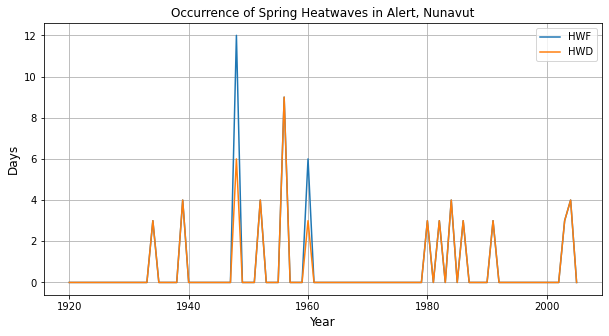

In [446]:
plt.figure(figsize=(10,5))
#plt.plot(range(1920,2006),hwn_min, color='blue', label='HWN') 
plt.plot(range(1920,2006),hwf_max, label='HWF') 
plt.plot(range(1920,2006),hwd_max, label='HWD') 
font = {'family': 'Sans',
        'color': 'black', 
        'weight': 'normal', 
        'size': 12,
       }
plt.title('Occurrence of Spring Heatwaves in Alert, Nunavut', fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Days', fontdict=font)
plt.grid()
plt.legend();
#plt.savefig('alert_spr_hw', file='jpeg');
#plt.plot(range(1920,2006),hwn_max) #blue
#plt.plot(range(1920,2006),hwf_max) #orange
#plt.plot(range(1920,2006),hwd_max); #green
#plt.xlim(1980,2000)